# CREDIT CARD CUSTOMERS

https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)>

In [2]:
bankdata = pd.read_csv("BankChurners.csv")
bankdata.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# eliminiamo la prima e le ultime due colonne 

bankdata.drop(bankdata.columns[[0,-1, -2]], axis=1, inplace = True)


def visualizza_tutto (bankdata):
    with pd.option_context("display.max_rows", 20, "display.max_columns", 30):
        display(bankdata)

In [4]:
visualizza_tutto(bankdata)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


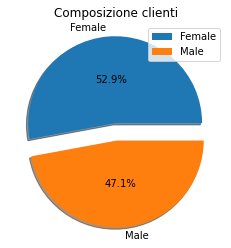

In [5]:
# vediamo graficamente la composizione dei clienti della banca in base al sesso


labels = 'Female', 'Male'
plt.pie((bankdata.Gender).value_counts(), labels=labels, autopct="%.1f%%", explode=[0.1]*2, shadow=True, pctdistance=0.5);
plt.title('Composizione clienti')
plt.legend(loc='best');

In [6]:
# Dividiamo il dataset in due subset in base al sesso

women = bankdata[bankdata.Gender== "F"]
men = bankdata[bankdata.Gender== "M"]


In [7]:
# Mediamente sono più vecchi gli uomini o le donne?

bankdata.groupby('Gender')['Customer_Age'].mean()

Gender
F    46.456887
M    46.178863
Name: Customer_Age, dtype: float64

Text(0.5, 1.0, 'Women')

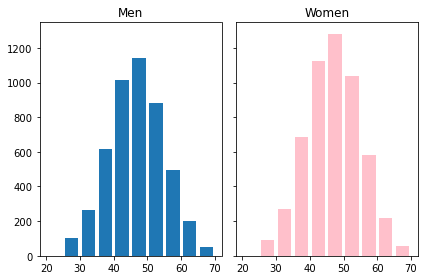

In [8]:
# vediamo la distribuzione dell'età in base al sesso

bins = [20,25,30,35,40,45,50,55,60,65, 70]
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True);
axs[0].hist("Customer_Age",bins, data=men, histtype='barstacked', rwidth=0.8);
axs[0].set_title('Men')
axs[1].hist("Customer_Age",bins, data=women, histtype='barstacked', rwidth=0.8, color='pink');
axs[1].set_title('Women')

In [9]:
# Suddivisione in base al reddito


income_category=bankdata.Income_Category.value_counts()
pd.DataFrame(income_category)
income_category

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

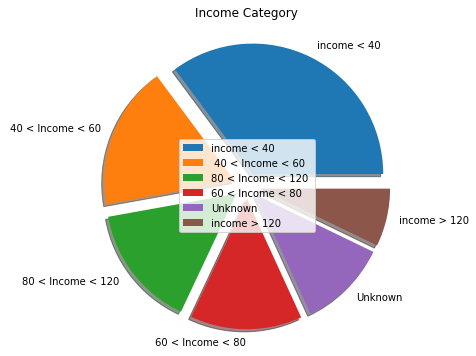

In [10]:
labels= "income < 40 ", " 40 < Income < 60", "80 < Income < 120 ", "60 < Income < 80", "Unknown", "income > 120"
plt.figure(figsize=(10,6))
plt.pie(income_category, labels=labels, explode=(0.1,0.1,0.1,0.1,0.1,0.1), shadow=True);
plt.title("Income Category")
plt.legend(loc= 10)

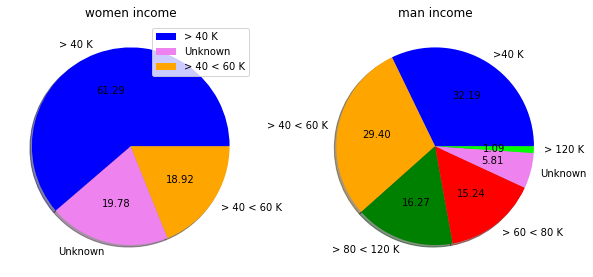

In [11]:
# Guadagnano di più gli uomini o le donne?

women_income_category = women.Income_Category.value_counts()

men_income_category = men.Income_Category.value_counts()


labels= ">40 K", "> 40 < 60 K", "> 80 < 120 K", "> 60 < 80 K", "Unknown", "> 120 K"
labels1="> 40 K", "Unknown", "> 40 < 60 K"
plt.figure(figsize=(10,10));
ax1 = plt.subplot2grid((2,2), (0, 0))
colors= "blue", "violet", "orange"
colors2="blue", "orange", "green", "red", "violet", "lime"
plt.pie(women_income_category, labels=labels1, colors=colors, autopct= '%.2f', shadow=True);
plt.title("women income")
plt.legend(loc="best")
ax2 = plt.subplot2grid((2,2), (0, 1))
plt.pie(men_income_category, labels=labels, colors=colors2, autopct= '%.2f', shadow= True);
plt.title("man income");


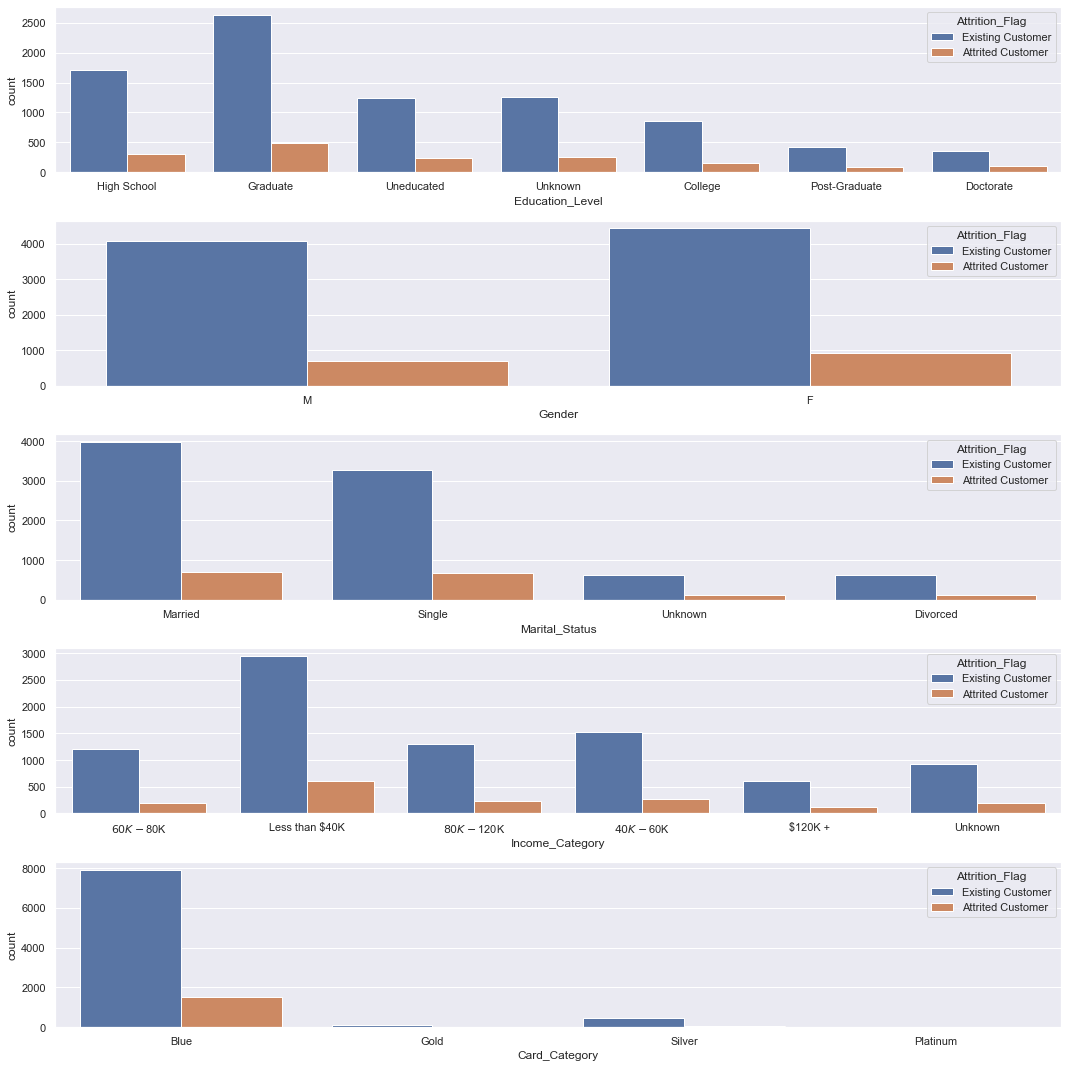

In [12]:
# Suddividiamo le variabili categoriche tra clienti esistenti e clienti che hanno abbandonato la banca


sns.set_theme(style='darkgrid')
fig, axes=plt.subplots(5,1, figsize=(15,15), tight_layout=True)
sns.countplot(ax=axes[0], x=bankdata['Education_Level'], hue=bankdata['Attrition_Flag'])
sns.countplot(ax=axes[1], x=bankdata['Gender'], hue=bankdata['Attrition_Flag'])
sns.countplot(ax=axes[2], x=bankdata['Marital_Status'], hue=bankdata['Attrition_Flag'])
sns.countplot(ax=axes[3], x=bankdata['Income_Category'], hue=bankdata['Attrition_Flag'])
sns.countplot(ax=axes[4], x=bankdata['Card_Category'], hue=bankdata['Attrition_Flag'])

In [13]:
#tasso medio di utilizzo tra clienti esistenti e clienti che hanno abbandonato

bankdata.groupby('Attrition_Flag')['Avg_Utilization_Ratio'].mean()

Attrition_Flag
Attrited Customer    0.162475
Existing Customer    0.296412
Name: Avg_Utilization_Ratio, dtype: float64

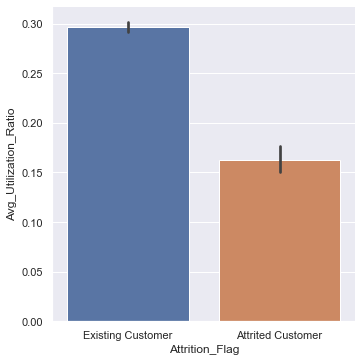

In [14]:
#vediamolo graficamente

sns.catplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", kind="bar", data=bankdata);

In [15]:
# adesso prendiamo solo le variaibli numeriche

bankdata_num=bankdata.loc[:, 'Months_on_book':'Avg_Utilization_Ratio']

In [16]:
bankdata_num.head(5)

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


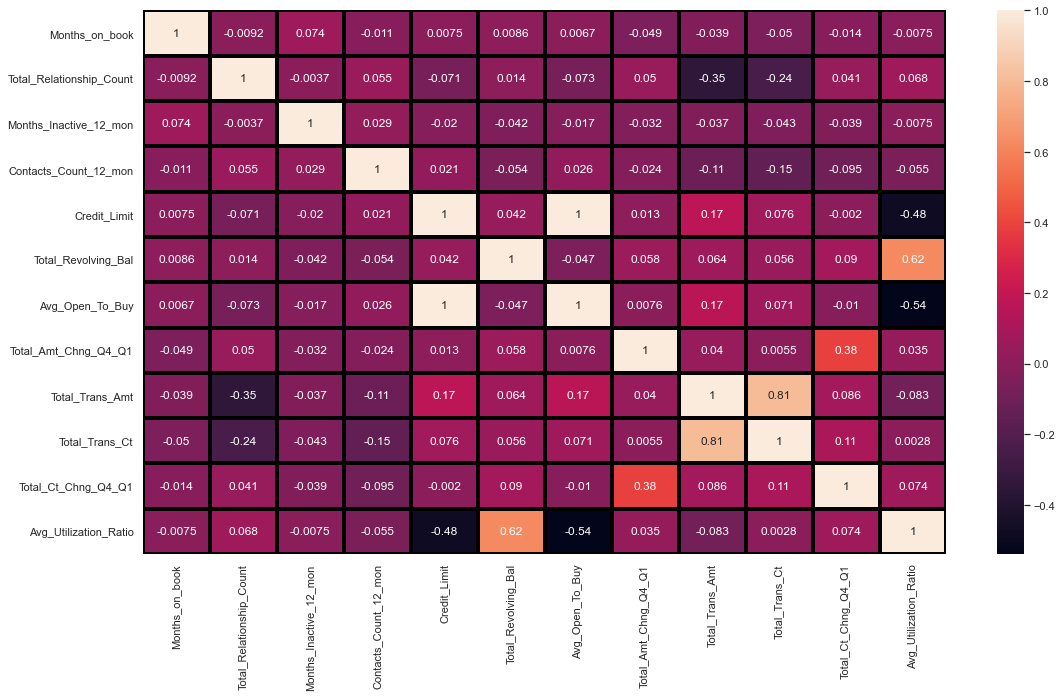

In [17]:
# heatmap per vedere quali variabili sono correlate

fig, ax = plt.subplots()
fig.set_size_inches(18,10)
sns.heatmap(bankdata_num.corr(), annot=True, linewidths=3, linecolor='black')

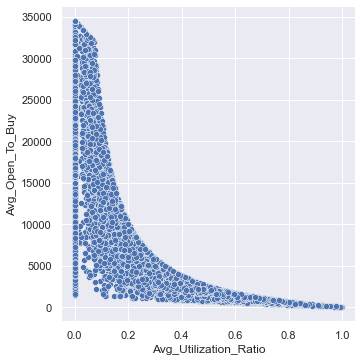

In [18]:
# Correlazione negativa tra il tasso medio di utilizzo e l'acquisto di linee di credito

sns.relplot(x='Avg_Utilization_Ratio', y='Avg_Open_To_Buy' ,kind="scatter", data = bankdata_num)

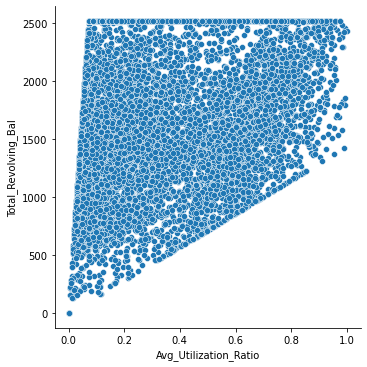

In [19]:
# Correlazione positiva tra il tasso medio di utilizzo e il saldo rotativo

sns.relplot(x='Avg_Utilization_Ratio', y='Total_Revolving_Bal',  data=bankdata_num)

Text(0.5, 1.0, 'Total Transaction Count/Total Transaction Amount')

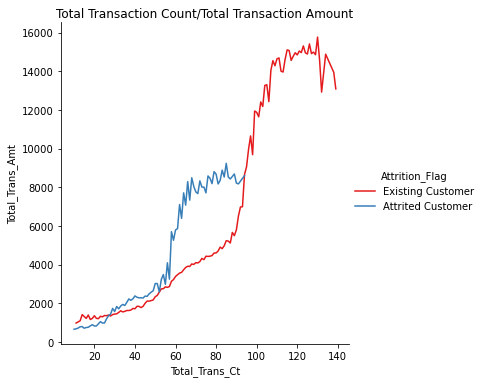

In [20]:
# Relazione positiva tra il numero di transazioni e l'ammontare delle stesse suddivise tra clienti attivi e clienti che hanno abbandonato

sns.relplot(x="Total_Trans_Ct", y="Total_Trans_Amt", hue="Attrition_Flag", data=bankdata, ci=None, markers=["o", "x"], palette="Set1", kind='line');
plt.title('Total Transaction Count/Total Transaction Amount')

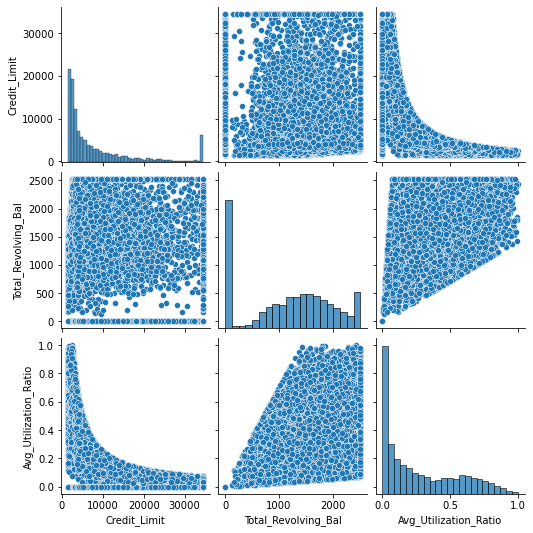

In [21]:
subset=bankdata.loc[:,['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']]
sns.pairplot(subset)